# Exploring Machine Learning for 1 Electron Case

**Harrison LaBollita**, Department of Physics, Michigan State University and Department of Mathematics and Physics, Piedmont College

This is an exploration of the sci-kit machine learning packages to see their performance on the simulated beta decay data we have avaliable. From the 1000000 events we have avaliable I have saved events 1-1999 for training data and events 2000-2050 for testing purposes. I am testing the following regression alogrithms: Linear Regression, Lasso Regression, Ridge Regression, MLPRegressor - solver 'adam', and MLPRegressor - solver 'lbfgs'. I will measure the performance of these algorithms by running various error analyses as well. This was done by finding the $R^{2}$ score for each value of $\lambda$ that I tried. From context it is obvious I am treating the problem as a regression problem, meaning I am trying to fit the following equation $${\bf w} = {\it M} \: {\bf v}$$ where the vector $v$ is a 256-dimensional vector and is being mapped to the vector $w$ which is just a one-dimensional vector. This is done by finding the matrix ${\it M}$, which effectively maps from the $v \in V$ to $w \in W$ where $V$ and $W$ are vector spaces, respectively. The physical representation is as follows: the input vector is a $16 \times 16$ detector grid with each cell representing a pixel. This grid is then reshaped into a vector of length 256. When an electron interacts with a cell it deposits some amount of energy $E$; this makes this pixel have a non-zero value. Our goal is to then be able to find where the origin of the electron was based off how it interacts with the detector. Our goal is from the array of pixels can we find its initial positions $(x,y)$. In this data, we have a single electron at initial energy 3.06 MeV interacting with the detector. However, this is the simplest case. In the future, we will be worried about the initial energy of the electron as well as the position and there will be more than one electron interacting with the grid. For now we are ignoring all of these other additions including the energy, because for this data all of the initial energies are the same so the algorithm is pointless for us. 

## Lasso and Ridge Regression 
Linear Regression is rather straightforward. We are fitting the ubiquitous equation, $y = mx + b$, and we have the standard difference of square cost function to measure our performance. In this report, we will also employ the Lasso and Ridge Regression algorithms. So I provide a quick reminder of what Lasso and Ridge regressions are referring to. Lasso and Ridge regressions are L1 and L2 regularizaiton methods, respecitively. This means they incorporate a penalty term into their cost function that the genric Least Squares Regression does not. Lasso Regression is the L1 regularizaiton technique, the cost function has the form: $$ C_{lasso} = \sum_{i=1}^{n} \Big ( y_{i} - \sum_{j=1}^{p} x_{ij} \beta_{j} \Big )^{2} + \lambda \sum_{j=1}^{p} | \beta_{j} |.$$  Ridge Regression is the L2 Regularization technique, its cost function has the form: $$ C_{ridge} = \sum_{i=1}^{n} \Big ( y_{i} - \sum_{j=1}^{p} x_{ij} \beta_{j} \Big )^{2} + \lambda \sum_{j=1}^{p} ( \beta_{j})^{2}.$$
As you can see, the $\lambda$ in front of the sum over $\beta$ controls the weight of this penality term. This is what we adjust in our algorithms to see if we can find the "sweet spot" which corresponds to the best performance of our linear regression algorithms.

In [2]:
#Load necessary libraries
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error


# data takes in the file "BetaScint2DEnergy.csv" and creates a vector of events and ouputs
def get_data(filename):
    file = open(filename)
    events = csv.reader(file)
    data = []
    for event in events:
        data.append(event)
    data = np.asarray(data)
    N, M = data.shape
    val = np.zeros((N,M))
    for i in range(N):
        for j in range(M):
            val[i][j] = float(data[i][j])
    grid = val[:,0:256]
    outs = val[:,256:]
    events = []
    outputs = []
    for i in range(len(grid)):
        events.append(grid[i,:])
    for i in range(len(outs)):
        outputs.append(outs[i,:])
    return events, outputs

In [3]:
#Format Data into the desired Training and Testing Sets. Here we are training on 1999 events and testing on 
# events 2000 - 2050 . Can be adjusted accordingly since we are reading in all 1000000 events.
grid, outputs = get_data("BetaScint2DEnergy.csv")
X_train = grid[:1999]
X_test = grid[2000:2050]
Y_train = outputs[:1999]
Y_test = outputs[2000:2050]

#Based on my reading the training has to be done for each output feature, 
#it can not be done all at once. So we must follow the recipe of train, predict, repeat 
#for each feature in our output vector. 

# I am making an energy vector, but we will not be using it because all of the energies
# are the same so the machine will easily learn this. 
Y_energy  = []
Y_x = []
Y_y = []
x_actual = []
y_actual = []

for i in range(len(Y_train)):
    Y_energy.append(Y_train[i][0])
for x in range(len(Y_train)):
    Y_x.append(Y_train[x][1])
for y in range(len(Y_train)):
    Y_y.append(Y_train[y][2])
for x in range(len(Y_test)):
    x_actual.append(Y_test[x][1])
for y in range(len(Y_test)):
    y_actual.append(Y_test[y][2])

In [4]:
#Linear Models - Linear Regression, Lasso, and Ridge
leastsq = linear_model.LinearRegression()
lasso = linear_model.Lasso()
ridge = linear_model.Ridge()

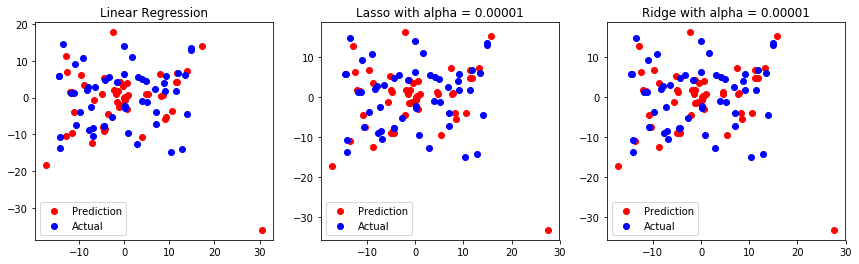

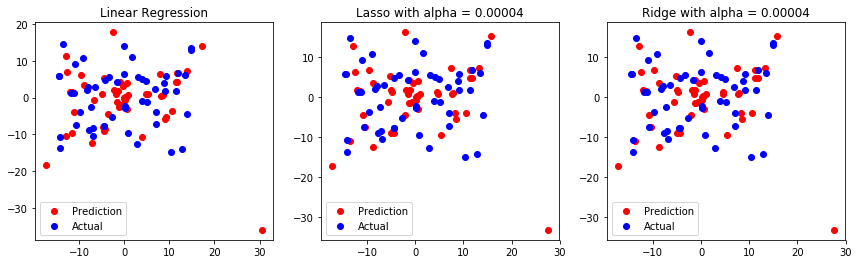

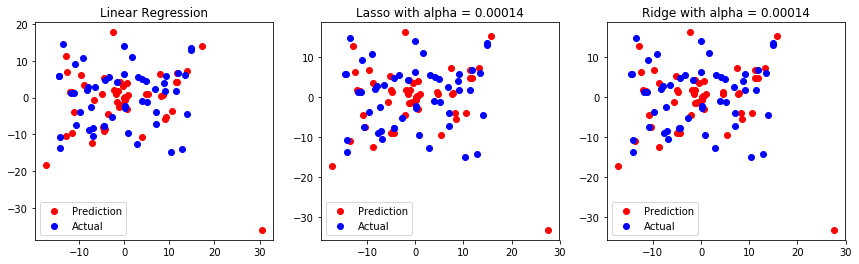

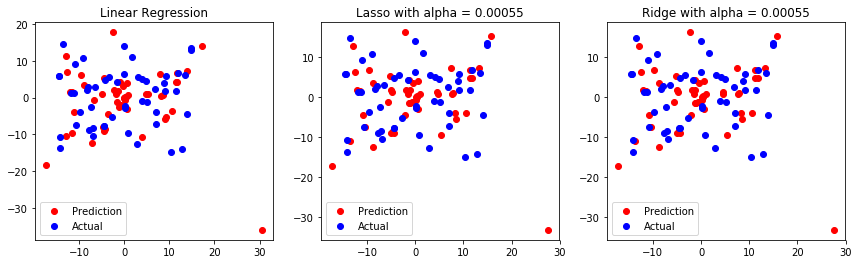

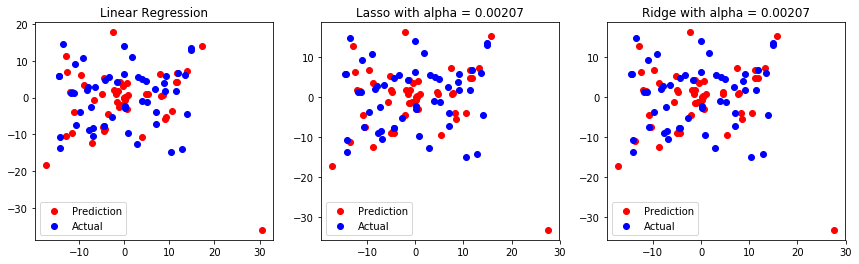

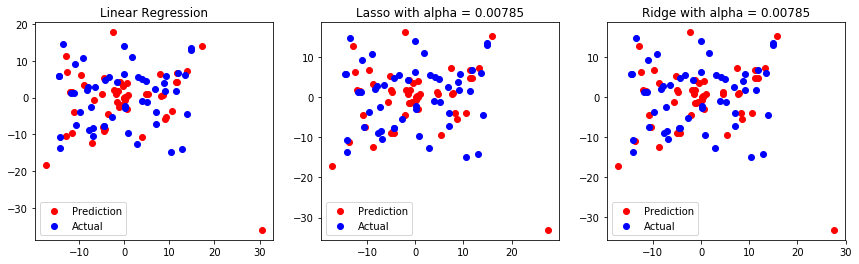

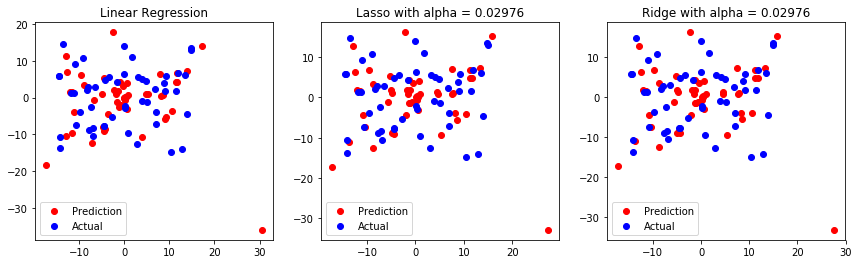

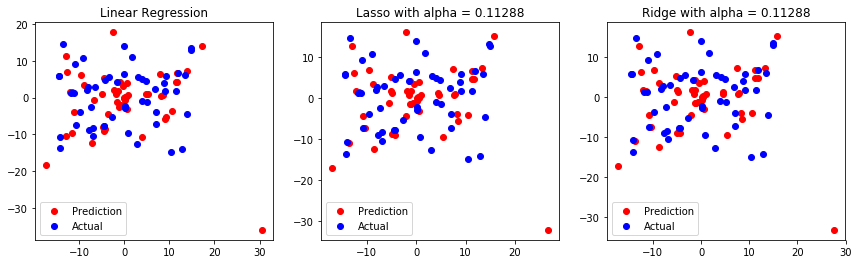

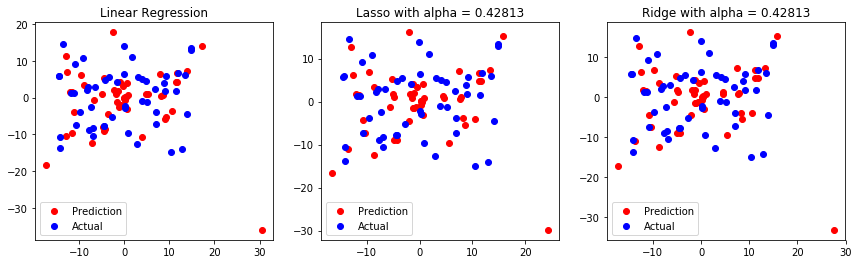

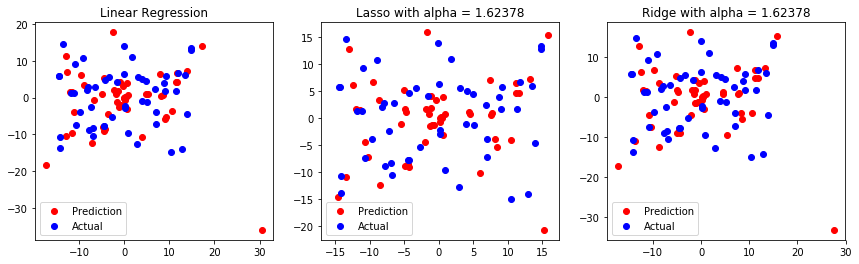

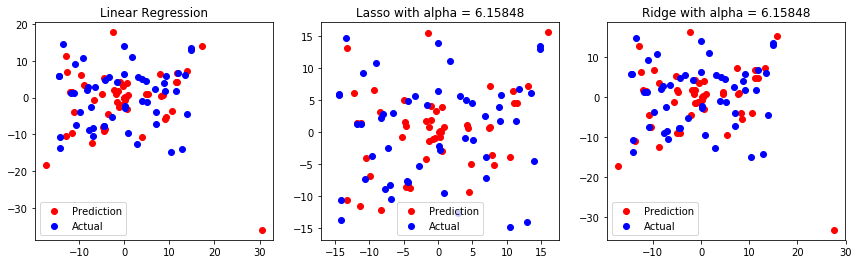

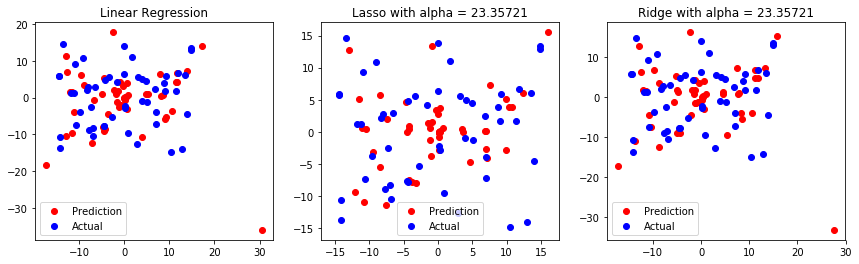

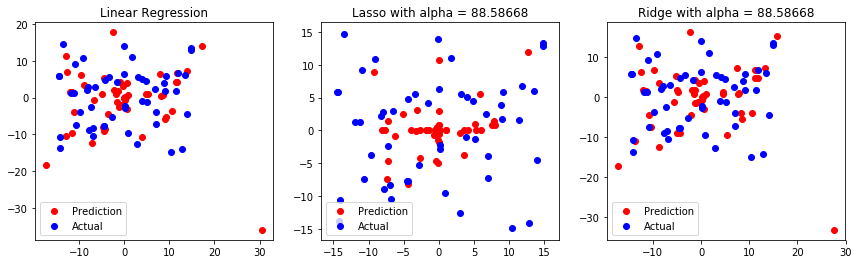

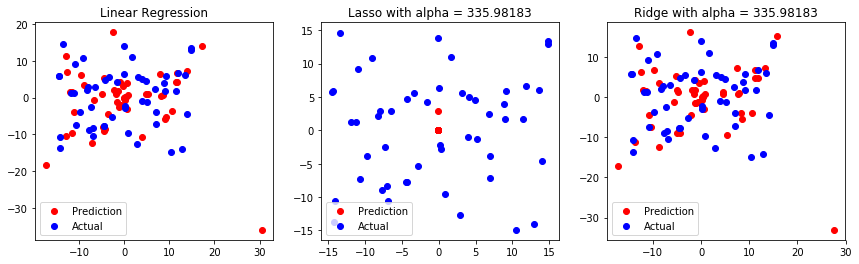

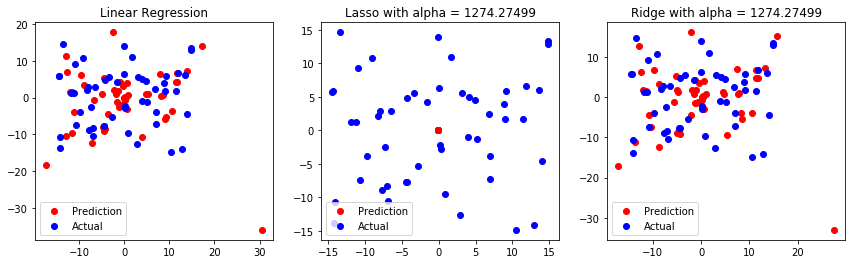

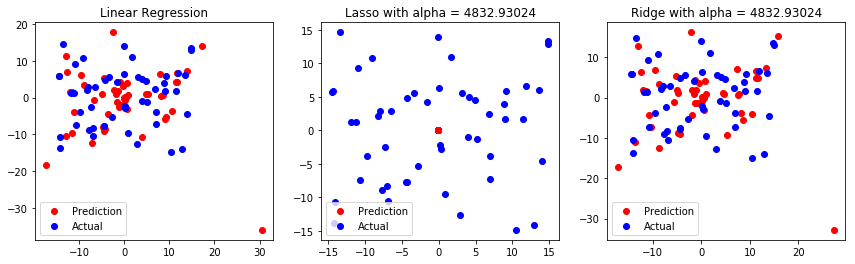

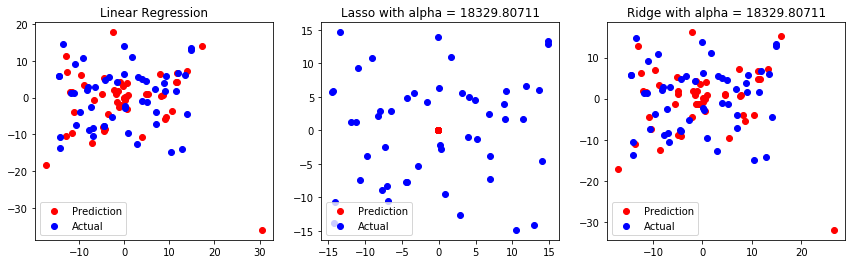

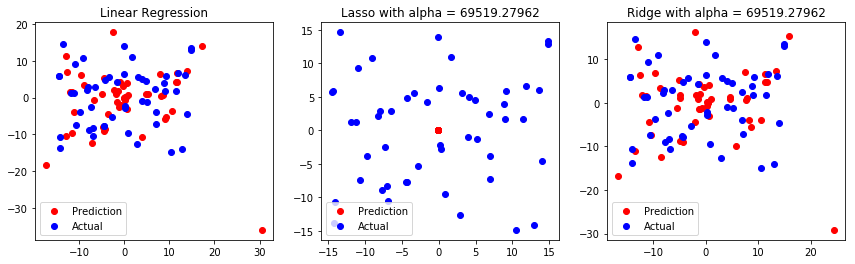

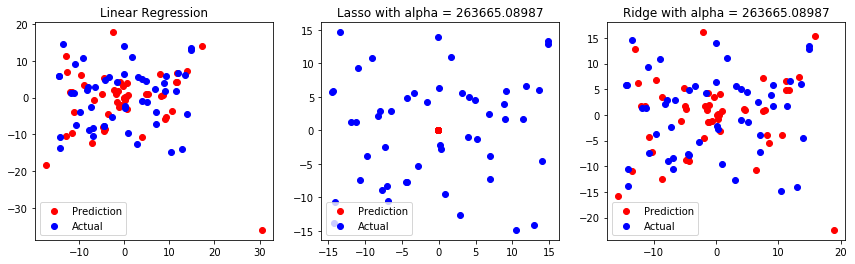

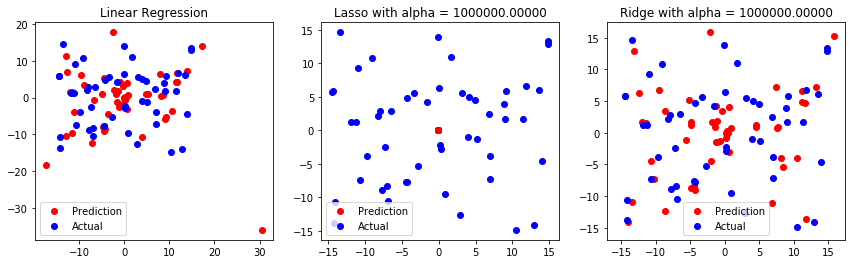

In [39]:
# define error lists
errors_leastsq_x = []
errors_leastsq_y = []
errors_ridge_x = []
errors_ridge_y = []
errors_lasso_x = []
errors_lasso_y = []

lmbdas = np.logspace(-5,6,20)

for i in range(len(lmbdas)):
    
    value = lmbdas[i]
    
    #Least Square Training 
    leastsq.fit(X_train, Y_x)
    leastsq_predictx = leastsq.predict(X_test)
    leastsq_predictx[40]=0
    errors_leastsq_x.append(r2_score(x_actual, leastsq_predictx))                    
    leastsq.fit(X_train, Y_y)
    leastsq_predicty = leastsq.predict(X_test)
    leastsq_predicty[40]=0
    errors_leastsq_y.append(r2_score(y_actual, leastsq_predicty))
    
    #Metrics
    #mean_squared_error
    #print('Mean Squared Error for x: %.2f' %mean_squared_error(x_actual, leastsq_predictx))
    #print('Mean Squared Error for y: %.2f' %mean_squared_error(y_actual, leastsq_predicty))
    #Variance
    #print('Variance score x: %.2f' % r2_score(x_actual, leastsq_predictx))
    #print('Variance score y: %.2f' % r2_score(y_actual, leastsq_predicty))
             
    #Lasso Training 
    lasso.set_params(alpha=value)
    lasso.fit(X_train, Y_x)
    lasso_predictx = lasso.predict(X_test)
    errors_lasso_x.append(r2_score(x_actual,lasso_predictx))
    lasso.set_params(alpha=value)
    lasso.fit(X_train, Y_y)
    lasso_predicty = lasso.predict(X_test)
    errors_lasso_y.append(r2_score(y_actual, lasso_predicty))

    #Metrics
    #print("Metrics for Lasso with alpha = %.2f" %(value))
    #mean_squared_error
    #print('Mean Squared Error for x: %.2f' %mean_squared_error(x_actual, lasso_predictx) )
    #print('Mean Squared Error for y: %.2f' %mean_squared_error(y_actual, lasso_predicty))
    #Variance
    #print('Variance score x: %.2f' % r2_score(x_actual, lasso_predictx))
    #print('Variance score y: %.2f' % r2_score(y_actual, lasso_predicty))
    
    #Ridge Training 
    ridge.set_params(alpha = value)
    ridge.fit(X_train, Y_x)
    ridge_predictx = ridge.predict(X_test)
    errors_ridge_x.append(r2_score(x_actual, ridge_predictx))
    ridge.set_params(alpha = value)
    ridge.fit(X_train, Y_y)
    ridge_predicty = ridge.predict(X_test)
    errors_ridge_y.append(r2_score(y_actual, ridge_predicty))
    
    #Metrics
    #print("Metrics for Ridge with alpha = %.2f" %(value))
    #mean_squared_error
    #print('Mean Squared Error for x: %.2f' %mean_squared_error(x_actual, ridge_predictx))
    #print('Mean Squared Error for y: %.2f' %mean_squared_error(y_actual, ridge_predicty))
    #Variance
    #print('Variance score x: %.2f' % r2_score(x_actual, ridge_predictx))
    #print('Variance score y: %.2f' % r2_score(y_actual, ridge_predicty))
    

    fig, ax = plt.subplots(1, 3)
                            
    #Least Square Plot
    ax[0].scatter(leastsq_predictx, leastsq_predicty, c ='r', label = "Prediction")
    ax[0].scatter(x_actual, y_actual, c= 'b', label = "Actual")
    ax[0].set_title("Linear Regression")
    ax[0].legend(loc = 'best')

    #Lasso Plot
    ax[1].scatter(lasso_predictx, lasso_predicty, c ='r', label = "Prediction")
    ax[1].scatter(x_actual, y_actual, c= 'b', label = "Actual")
    ax[1].set_title("Lasso with alpha = %.5f" %(value))
    ax[1].legend(loc = 'best')
    
    
    #Ridge Plot
    ax[2].scatter(ridge_predictx, ridge_predicty, c ='r', label = "Prediction")
    ax[2].scatter(x_actual, y_actual, c= 'b', label = "Actual")
    ax[2].set_title("Ridge with alpha = %0.5f" %(value))
    ax[2].legend(loc = 'best')
                            
    fig.subplots_adjust(right =2.0)
    plt.show()

${\bf Note:}$ Unfortunatly, I had to delete the 40th value from the Linear Regression model. It predicted that the origin of an electron was at $\approx$ (10^13, 10^14), which is obviously wrong. Taking out this point allowed me to get a better view of how the algoritm performed on the other points. This problem could most likely be fixed by training the Linear Regression on more than 2000 events, maybe say 100000 events. 

## Error Analysis - Regression
These plots are a good indicactor of the performance of each model. Here we have the values of $\lambda$ plotted on the x-axis and the performance, the $R^{2}$ score, plotted on the y-axis. The closer we are to the value of $1$ the better we are doing. Referencing the graph below, we can see that at low values of $\lambda$ all three models were performing equally, which is what we would expect. This is because the only difference in these algorithms is the penality term in the cost function, which is weighted by the value of $\lambda$. At $\lambda \approx 1$, LASSO achieved its best $R^{2}$ score which for the x-values was about $0.9$ and for the y-values about $0.8$. We see that as $\lambda$ approaches larger values ($\lambda > 10^{1}$), Ridge Regression begins to achieve better performance. At the largest values of $\lambda$, the Ridge Regression achieved its highest $R^{2}$ value, which I believe was slightly higher than Lasso's $0.9$. Another interesting point to note is that for all three algorithms were able to predict the $x$-coordinate better than the $y$-coordinate of the position.

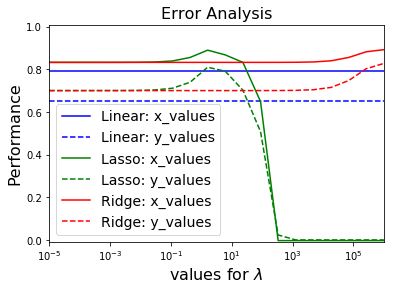

In [49]:
plt.semilogx(lmbdas, errors_leastsq_x, 'b', label = "Linear: x_values" )
plt.semilogx(lmbdas, errors_leastsq_y, '--b', label = "Linear: y_values")
plt.semilogx(lmbdas, errors_lasso_x, 'g', label = "Lasso: x_values")
plt.semilogx(lmbdas, errors_lasso_y, '--g', label = "Lasso: y_values")
plt.semilogx(lmbdas, errors_ridge_x, 'r', label = "Ridge: x_values")
plt.semilogx(lmbdas, errors_ridge_y, '--r', label = "Ridge: y_values")

plt.legend(loc = 'lower left', fontsize = 14)
plt.title("Error Analysis", fontsize =16)
plt.ylim([-0.01,1.01])
plt.xlim([min(lmbdas), max(lmbdas)])
plt.xlabel(r"values for $\lambda$",fontsize = 16)
plt.ylabel("Performance", fontsize =16)
plt.show()

## Neural Network - MLPRegressor
We will now try the neural network regression algorithms provided by sci-kit learn. This a Multi-Layer Perceptron Regressor, which optimizes the cost function differently from Lasso and Ridge. Here we are testing the performance of two different solvers called ${\it adam}$ and ${\it LBFGS}$. Both of which are just different techniques at optimizing the cost function. I also try different regularization parameters ($\lambda$) to help prevent overfitting. The MLP Regressor function can be more finely tuned beyond just what we have done here, such as changing the number of neurons, number of hidden layers,the activation function, etc. Since this is just an initial test, we will use the default settings only changing the solver to get a baseline test to see how we do. 

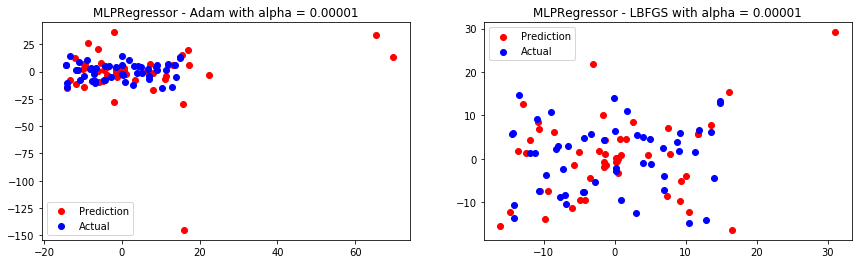

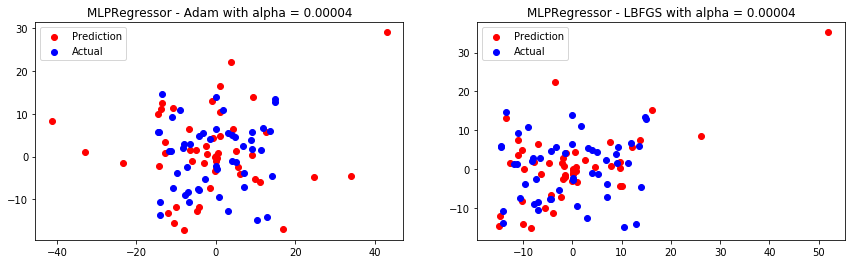

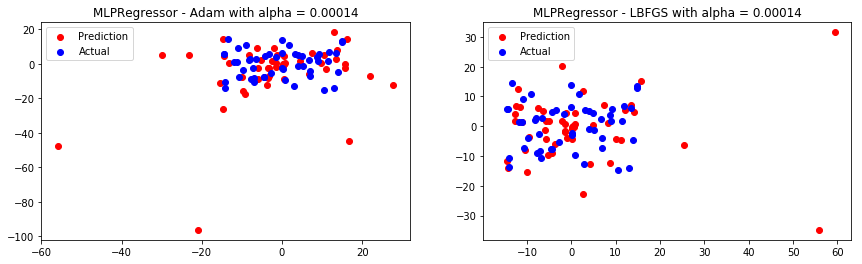

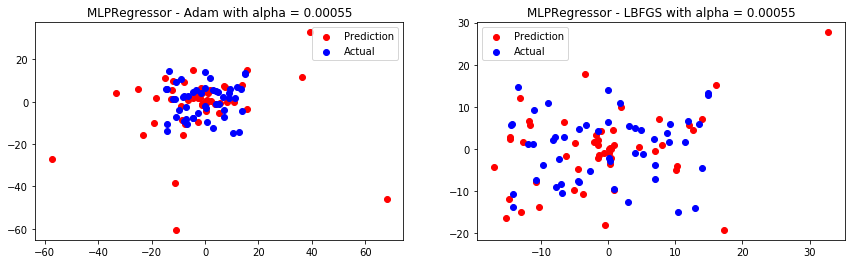

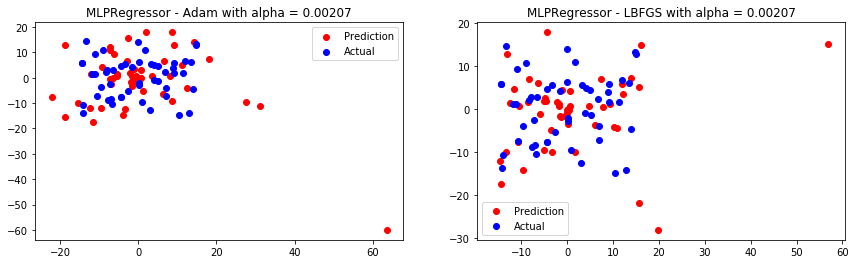

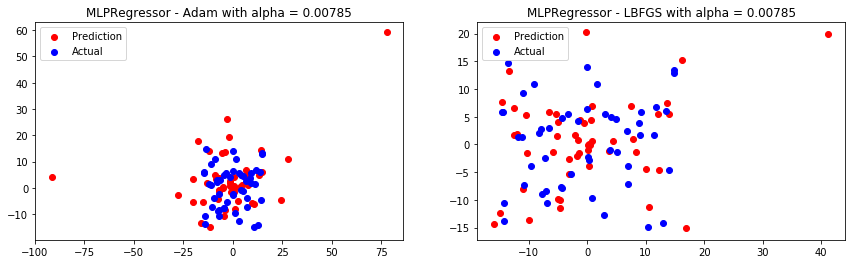

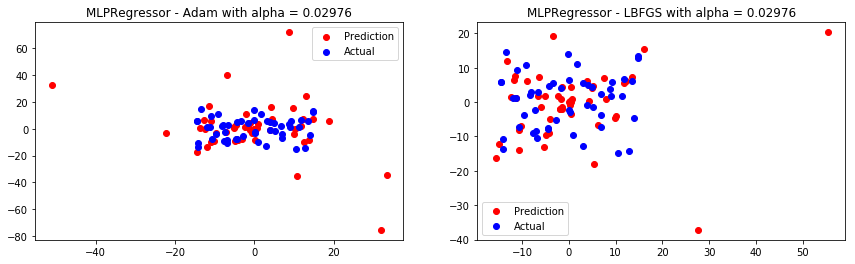

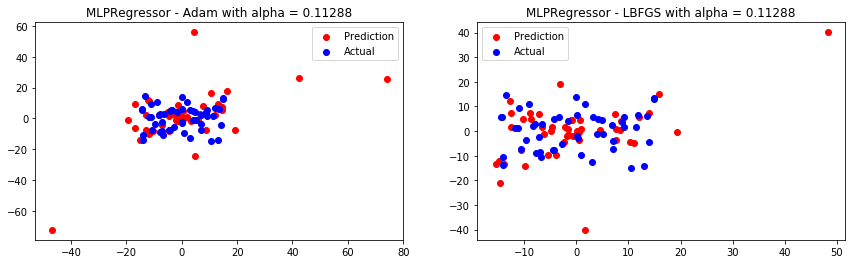

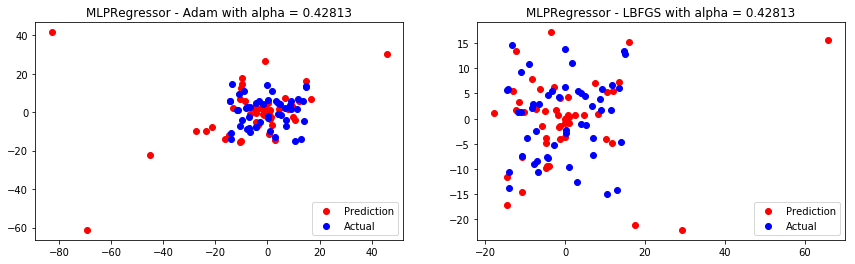

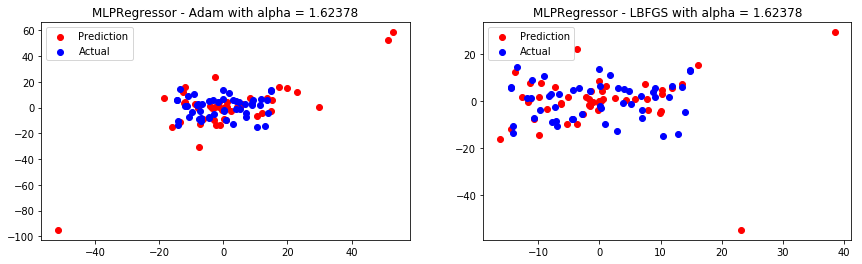

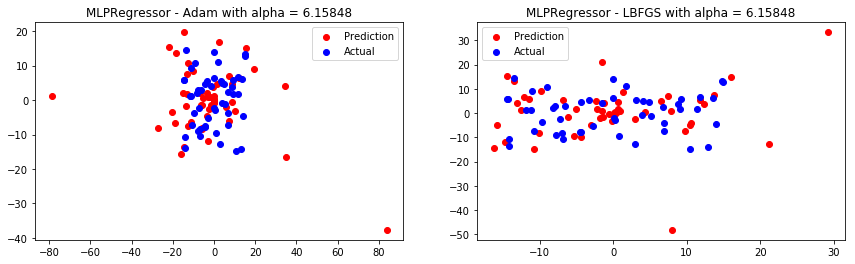

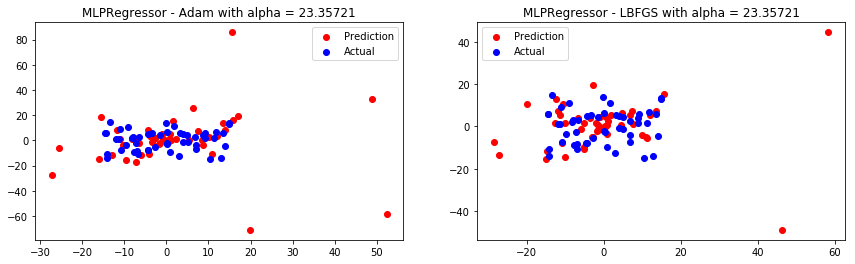

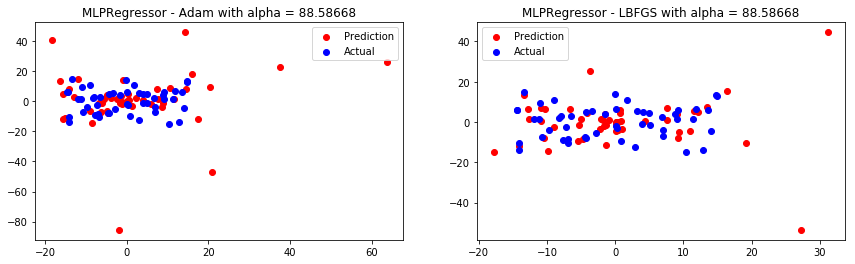

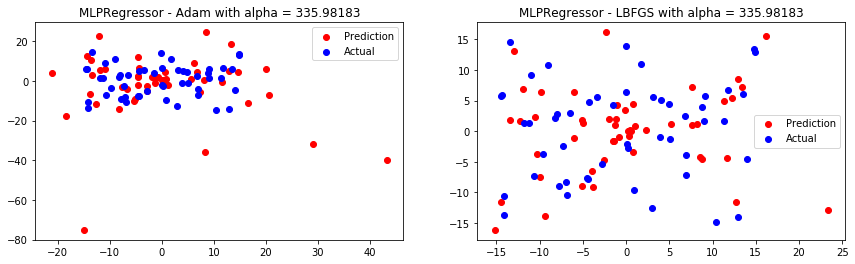

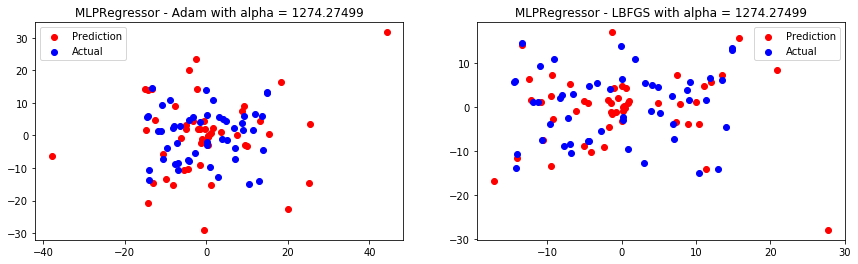

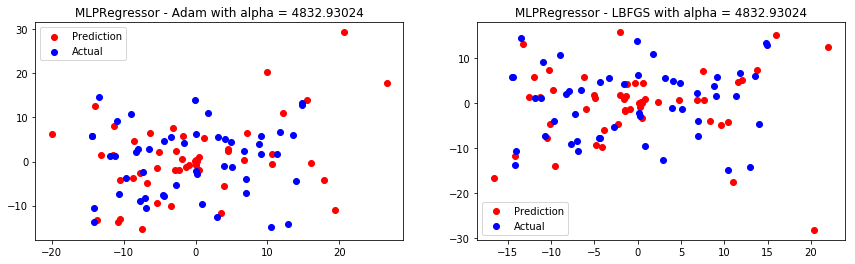

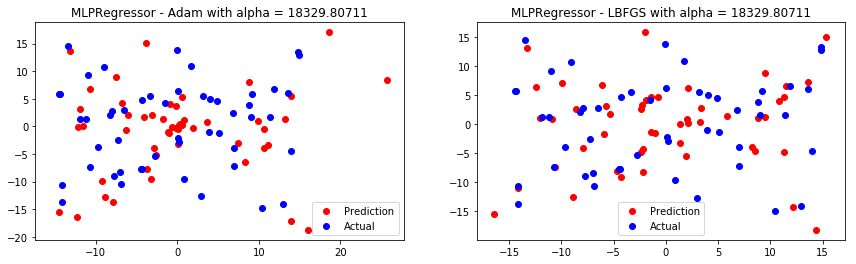

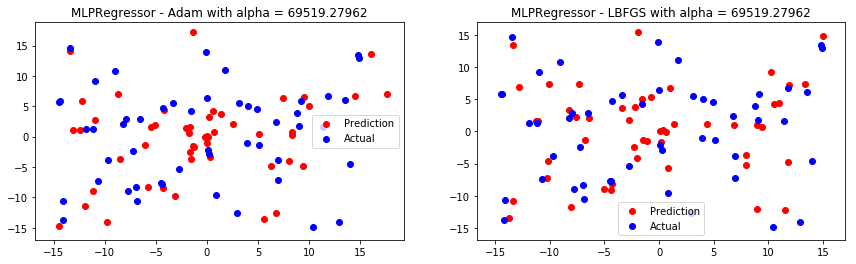

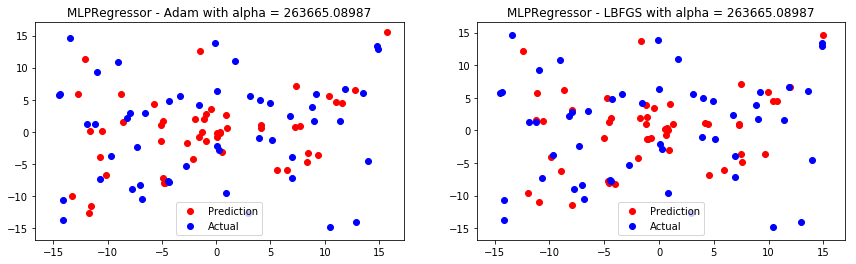

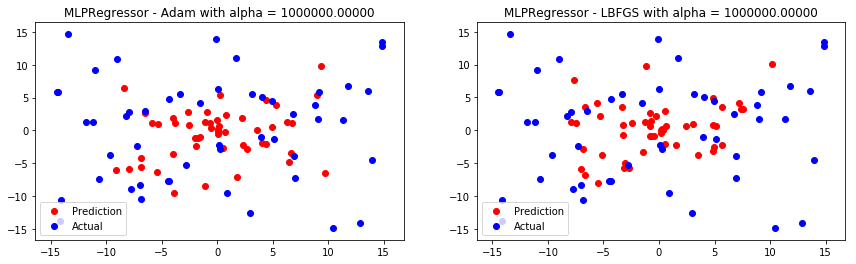

In [41]:
#Error lists
errors_adam_x = []
errors_adam_y = []
errors_lbfgs_x = []
errors_lbfgs_y = []

lmbdas = np.logspace(-5,6,20)

for i in range(len(lmbdas)):
    value = lmbdas[i]
    
    adam =MLPRegressor(solver = 'adam', learning_rate = 'adaptive', 
                       max_iter = 500, early_stopping = True)

    
    #MLPRegressor - Adam Solver 
    adam.set_params(alpha = value)
    adam.fit(X_train, Y_x)
    adam_predictx = adam.predict(X_test)
    errors_adam_x.append(r2_score(x_actual,adam_predictx))
    adam.set_params(alpha = value)
    adam.fit(X_train, Y_y)
    adam_predicty = adam.predict(X_test)
    errors_adam_y.append(r2_score(y_actual, adam_predicty))

    #Metrics
    #mean_squared_error
    #print('Mean Squared Error for x: %.2f' %mean_squared_error(x_actual, predictx))
    #print('Mean Squared Error for y: %.2f' %mean_squared_error(y_actual, predicty))
    #Variance
    #print('Variance score x: %.2f' % r2_score(x_actual, predictx))
    #print('Variance score y: %.2f' % r2_score(y_actual, predicty))


    #MLPRegressor - LBFGS Solver
    lbfgs = MLPRegressor(solver = 'lbfgs', learning_rate = 'constant', 
                         max_iter = 500)

    lbfgs.set_params(alpha = value)
    lbfgs.fit(X_train, Y_x)
    lbfgs_predictx = lbfgs.predict(X_test)
    errors_lbfgs_x.append(r2_score(x_actual, lbfgs_predictx))
    
    lbfgs.set_params(alpha = value)
    lbfgs.fit(X_train, Y_y)
    lbfgs_predicty = lbfgs.predict(X_test)
    errors_lbfgs_y.append(r2_score(y_actual, lbfgs_predicty))

    #Metrics

    #mean_squared_error
    #print('Mean Squared Error for x: %.2f' %mean_squared_error(x_actual, predictx))
    #print('Mean Squared Error for y: %.2f' %mean_squared_error(y_actual, predicty))
    #Variance
    #print('Variance score x: %.2f' % r2_score(x_actual, predictx))
    #print('Variance score y: %.2f' % r2_score(y_actual, predicty))
    
    fig, ax = plt.subplots(1,2)
    
    #Adam 
    ax[0].scatter(adam_predictx, adam_predicty, c='r', label = "Prediction")
    ax[0].scatter(x_actual, y_actual, c='b', label = "Actual")
    ax[0].set_title("MLPRegressor - Adam with alpha = %.5f" %(value))
    ax[0].legend(loc = 'best')
    
    #LBFGS
    ax[1].scatter(lbfgs_predictx, lbfgs_predicty, c= 'r', label = "Prediction")
    ax[1].scatter(x_actual, y_actual, c='b', label = "Actual")
    ax[1].set_title("MLPRegressor - LBFGS with alpha = %.5f" %(value))
    ax[1].legend(loc = 'best')
    
    fig.subplots_adjust(right = 2.0)
    plt.show()

## Error Analysis - MLPRegressor
Here we are evaluting the performance of our different solvers at different values of $\lambda$. Again on the x-axis we have the values of $\lambda$ and on the y-axis we have the performance, the $R^{2}$ score, at each value of $\lambda$. A perfect score is $R^{2} = 1$. We can see that at low values of $\lambda$ ($< 10^{3}$), both solvers are inconsistent with LBFGS doing slightly "better". But as $\lambda$ approaches $10^{5}$, we seem to be converging to the best $R^{2}$ score for both solvers. Another interesting point is that both predictions for $x$ and $y$ are converging together, which is nice compared to the previous error analysis of the linear regression algorithms.

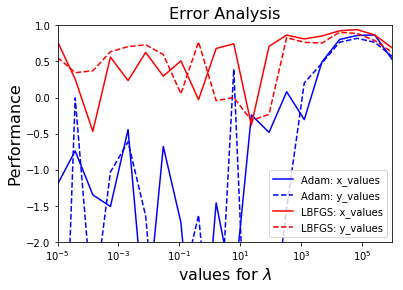

In [50]:
plt.semilogx(lmbdas, errors_adam_x, 'b', label = "Adam: x_values")
plt.semilogx(lmbdas, errors_adam_y, '--b', label = "Adam: y_values")
plt.semilogx(lmbdas, errors_lbfgs_x, 'r', label = "LBFGS: x_values")
plt.semilogx(lmbdas, errors_lbfgs_y, '--r',label = "LBFGS: y_values")
plt.legend(loc = 'lower right', fontsize = 10)
plt.title("Error Analysis", fontsize =16)
plt.xlim([min(lmbdas), max(lmbdas)])
plt.ylim([-2,1.01])
plt.xlabel(r"values for $\lambda$",fontsize = 16)
plt.ylabel("Performance", fontsize =16)
plt.show()

# Conclusion
This is the simplest case for the problem we have at hand. There will be more electrons added to the data alot of noise. There is still much work to be done on the machine learning algorithms. My first impression is that we need to optimize the features we have avaliable to us to help the computer better "learn" for its predictive model. The first immediate step would be to train the algorithms again on more than $2000$ events, maybe $100000$ or $500000$ and then test it on $50$ random events plucked from the remanining events. This could potentially give us better results or it could lead to over fitting. Another option would be to optimize the parameters of the best performers, which were the neural networks. Maybe it would be worth spending some time exploring and fine tuning teh MLP Regressor parameters to see what the optimum performace gets us in terms of predictive power. However, I think regression alone can be determined to be an insufficient tool in helping us solve this problem. It has been suggested pairing some techniques from convulational neural networks to help solve our problem. 

# References
<div class="cite2c-biblio"></div>